In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Gradient Method

In [2]:
lambs = [0.0, 0.1, 0.5, 1.0, 5.0, 10.0]
datasets = ['abalone', 'bodyfat', 'housing']

grad_dfs = [[], [], []]
for i in range(len(datasets)):
    for j in range(len(lambs)):
        grad_df = pd.read_csv(
            f'./Grad/{datasets[i]}_{lambs[j]}.csv', index_col = 0
        )
        grad_dfs[i].append(grad_df)

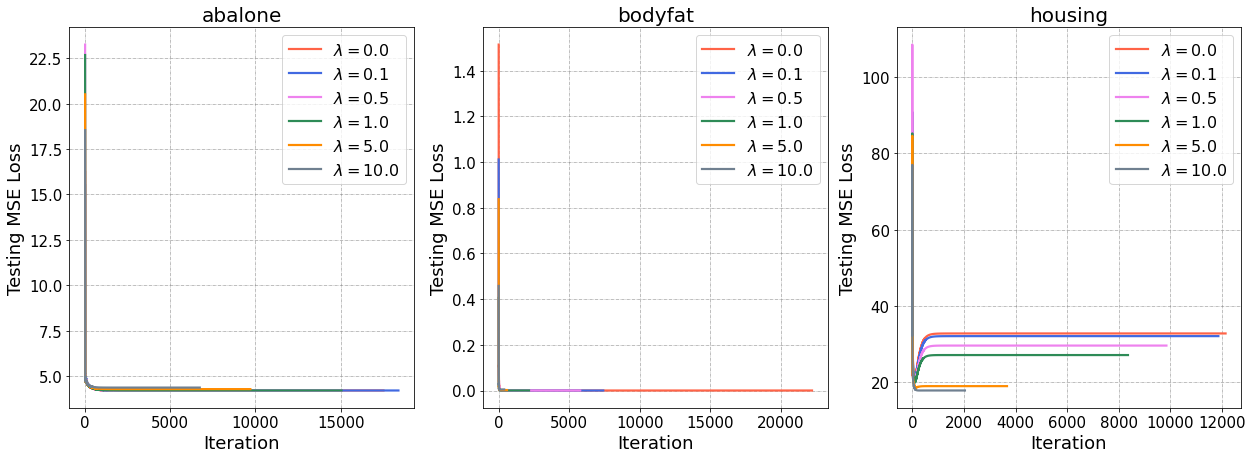

In [3]:
title_fs = 20
label_fs = 18
legend_fs = 16
tick_fs = 15
colors = [
    'tomato', 'royalblue', 'violet', 'seagreen', 'darkorange', 'slategray'
]

lw = 2.2
fig = plt.figure(figsize = (21, 7))
for i in range(3):
    plt.subplot(1, 3, i+1)
    for j in range(6):
        plt.plot(
            grad_dfs[i][j].iloc[:, 1], 
            lw = lw, color = colors[j],
            label = f'$\lambda = {lambs[j]}$'
        )
    plt.legend(fontsize = legend_fs)
    plt.title(datasets[i], fontsize = title_fs)
    plt.xlabel('Iteration', fontsize = label_fs)
    plt.ylabel('Testing MSE Loss', fontsize = label_fs)
    plt.tick_params(axis='both',labelsize = tick_fs)
    plt.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)
    plt.savefig('../../report/fig/Grad.pdf')
    plt.savefig('./pics/Grad.pdf')

### Conjugate Gradients Method

In [4]:
lambs = [0.0, 0.1, 0.5, 1.0, 5.0, 10.0]
datasets = ['abalone', 'bodyfat', 'housing']

conj_aba_dfs = [[], [], []]
for mode in range(3):
    for i in range(6):
        conj_df = pd.read_csv(
            f'./ConjGrad/abalone_{mode}_{lambs[i]}.csv', index_col = 0
        )
        conj_aba_dfs[mode].append(conj_df)
        
conj_bodyfat_dfs = [[], [], []]
for mode in range(3):
    for i in range(6):
        conj_df = pd.read_csv(
            f'./ConjGrad/bodyfat_{mode}_{lambs[i]}.csv', index_col = 0
        )
        conj_bodyfat_dfs[mode].append(conj_df)

conj_housing_dfs = [[], [], []]
for mode in range(3):
    for i in range(6):
        conj_df = pd.read_csv(
            f'./ConjGrad/housing_{mode}_{lambs[i]}.csv', index_col = 0
        )
        conj_housing_dfs[mode].append(conj_df)
        
conj_dfs = conj_aba_dfs + conj_bodyfat_dfs + conj_housing_dfs

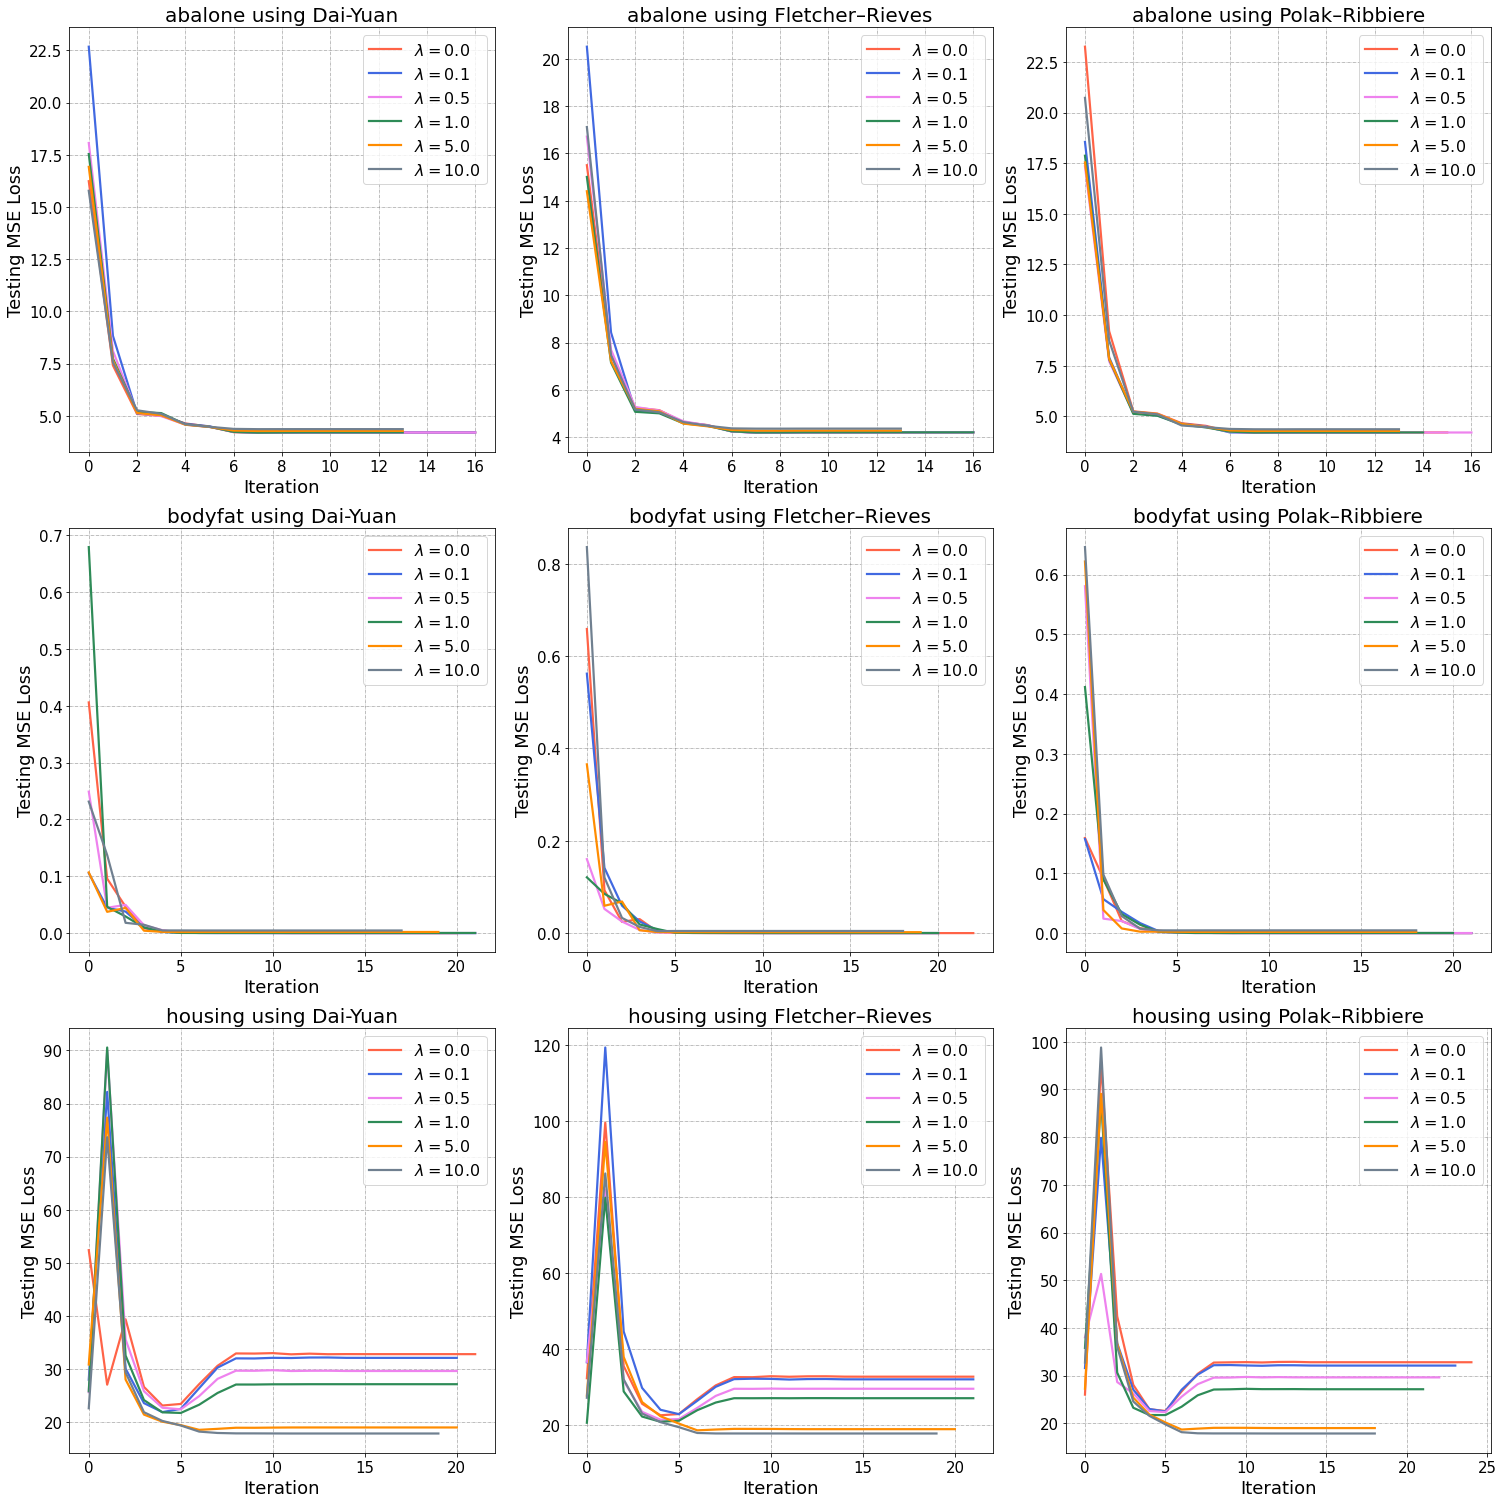

In [5]:
title_fs = 20
label_fs = 18
legend_fs = 16
tick_fs = 15
colors = [
    'tomato', 'royalblue', 'violet', 'seagreen', 'darkorange', 'slategray'
]
modes = ['Dai-Yuan', 'Fletcher–Rieves', 'Polak–Ribbiere']

datasets = ['abalone', 'bodyfat', 'housing']
lw = 2.2
fig = plt.figure(figsize = (21, 21))
for i in range(len(conj_dfs)):
    plt.subplot(3, 3, i+1)
    for j in range(6):
        plt.plot(
            conj_dfs[i][j].iloc[:, 1], 
            lw = lw, color = colors[j],
            label = f'$\lambda = {lambs[j]}$'
        )
    plt.legend(fontsize = legend_fs)
    plt.title(f'{datasets[i // 3]} using {modes[i % 3]}', fontsize = title_fs)
    plt.xlabel('Iteration', fontsize = label_fs)
    plt.ylabel('Testing MSE Loss', fontsize = label_fs)
    plt.tick_params(axis='both',labelsize = tick_fs)
    plt.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)
    plt.savefig('../../report/fig/ConjGrad.pdf')
    plt.savefig('./pics/ConjGrad.pdf')
plt.tight_layout()

### Quasi-Newton Methods

In [6]:
lambs = [0.0, 0.1, 0.5, 1.0, 5.0, 10.0]
datasets = ['abalone', 'bodyfat', 'housing']

qn_aba_dfs = [[], [], []]
for mode in range(3):
    for i in range(6):
        qn_df = pd.read_csv(
            f'./ConjGrad/abalone_{mode}_{lambs[i]}.csv', index_col = 0
        )
        qn_aba_dfs[mode].append(qn_df)
        
qn_bodyfat_dfs = [[], [], []]
for mode in range(3):
    for i in range(6):
        qn_df = pd.read_csv(
            f'./ConjGrad/bodyfat_{mode}_{lambs[i]}.csv', index_col = 0
        )
        qn_bodyfat_dfs[mode].append(qn_df)

qn_housing_dfs = [[], [], []]
for mode in range(3):
    for i in range(6):
        qn_df = pd.read_csv(
            f'./ConjGrad/housing_{mode}_{lambs[i]}.csv', index_col = 0
        )
        qn_housing_dfs[mode].append(qn_df)
        
qn_dfs = qn_aba_dfs + qn_bodyfat_dfs + qn_housing_dfs

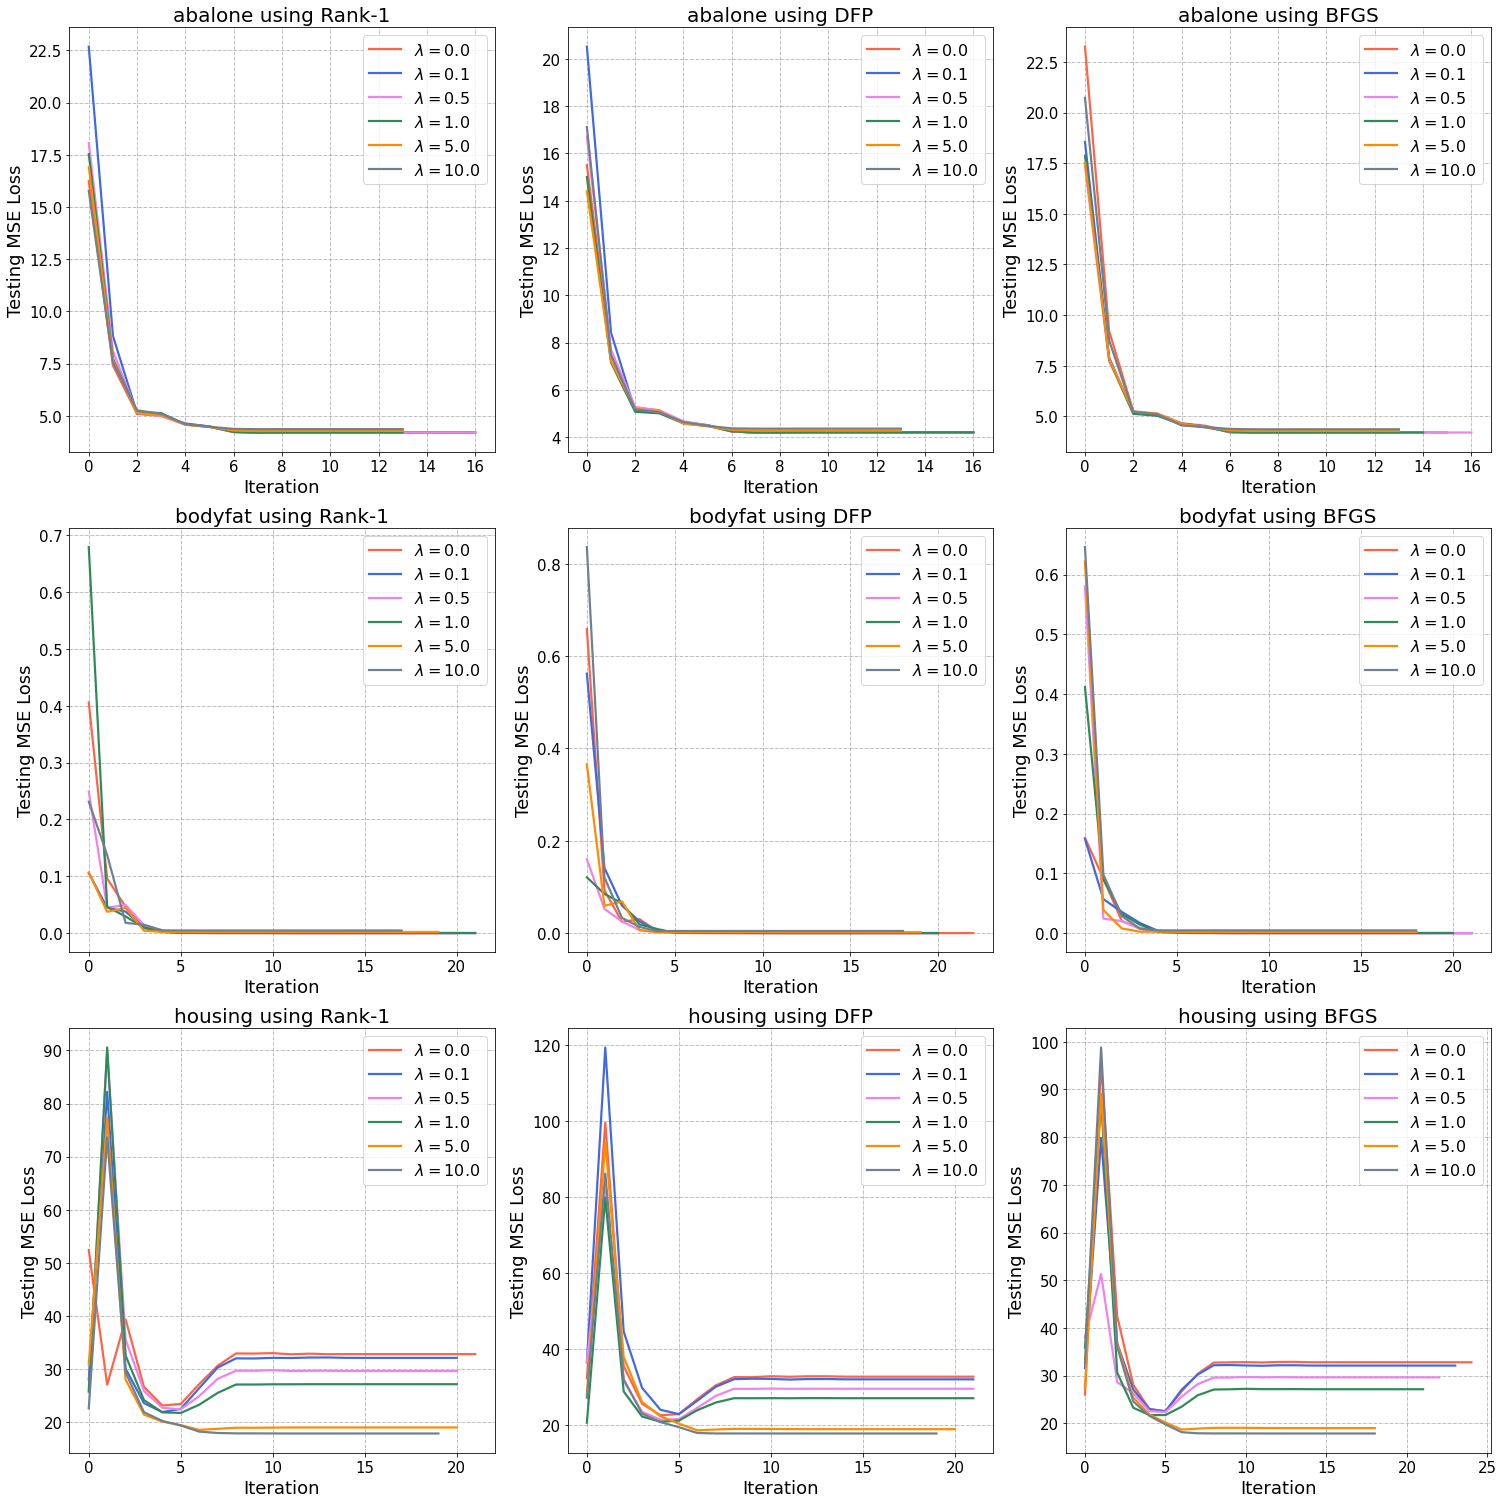

In [7]:
title_fs = 20
label_fs = 18
legend_fs = 16
tick_fs = 15
colors = [
    'tomato', 'royalblue', 'violet', 'seagreen', 'darkorange', 'slategray'
]
modes = ['Rank-1', 'DFP', 'BFGS']

datasets = ['abalone', 'bodyfat', 'housing']
lw = 2.2
fig = plt.figure(figsize = (21, 21))
for i in range(len(qn_dfs)):
    plt.subplot(3, 3, i+1)
    for j in range(6):
        plt.plot(
            qn_dfs[i][j].iloc[:, 1], 
            lw = lw, color = colors[j],
            label = f'$\lambda = {lambs[j]}$'
        )
    plt.legend(fontsize = legend_fs)
    plt.title(f'{datasets[i // 3]} using {modes[i % 3]}', fontsize = title_fs)
    plt.xlabel('Iteration', fontsize = label_fs)
    plt.ylabel('Testing MSE Loss', fontsize = label_fs)
    plt.tick_params(axis='both',labelsize = tick_fs)
    plt.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)
    plt.savefig('../../report/fig/QN.pdf')
    plt.savefig('./pics/QN.pdf')
plt.tight_layout()